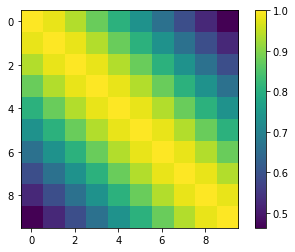

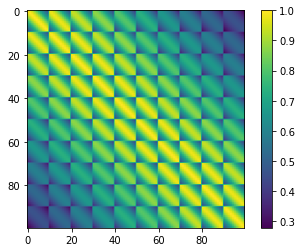

In [6]:
import time
from pylab import *
import matplotlib.gridspec as gridspec
import numpy as np
#construct background states, observations with error
%run covariance_matrix.ipynb
def x_to_y(X): # averaging in 2*2 windows (4 pixels)
    dim = X.shape[0]
    dim = 20
    Y = np.zeros((dim/2,dim/2))
    for i in range(dim/2):
        for j in range(dim/2):
            Y[i,j] = X[2*i,2*j] + X[2*i+1,2*j] + X[2*i,2*j+1] + X[2*i+1,2*j+1]
            
            Y_noise = np.random.multivariate_normal(np.zeros(100),0.0000 * np.eye(100))
            Y_noise.shape = (10,10)
            Y = Y + Y_noise
    return Y
    

class shallow(object):


    time = 0

    plt = []
    fig = []


    def __init__(self, x=[],y=[],h_ini = 1.,u=[],v = [],dx=0.01,dt=0.0001, N=100,L=1., px=50, py=50, R=100, Hp=0.1, g=1., b=2.): # How define no default argument before?


        # add a perturbation in pressure surface
        

        self.px, self.py = px, py
        self.R = R
        self.Hp = Hp

        

        # Physical parameters

        self.g = g
        self.b = b
        self.L=L
        self.N=N

        # limits for h,u,v
        
        
        #self.dx =  self.L / self.N # a changer
        #self.dt = self.dx / 100.
        self.dx=dx
        self.dt=dt
        
        self.x,self.y = mgrid[:self.N,:self.N]
        
        self.u=zeros((self.N,self.N))
        self.v=zeros((self.N,self.N))
        
        self.h_ini=h_ini
        
        self.h=self.h_ini * ones((self.N,self.N))
        
        rr = (self.x-px)**2 + (self.y-py)**2
        self.h[rr<R] = self.h_ini + Hp #set initial conditions
        
        self.lims = [(self.h_ini-self.Hp,self.h_ini+self.Hp),(-0.02,0.02),(-0.02,0.02)]
        
        

    def dxy(self, A, axis=0):
        """
        Compute derivative of array A using balanced finite differences
        Axis specifies direction of spatial derivative (d/dx or d/dy)
        dA[i]/dx =  (A[i+1] - A[i-1] )  / 2dx
        """
        return (roll(A, -1, axis) - roll(A, 1, axis)) / (self.dx*2.) # roll: shift the array axis=0 shift the horizontal axis

    def d_dx(self, A):
        return self.dxy(A,1)

    def d_dy(self, A):
        return self.dxy(A,0)


    def d_dt(self, h, u, v):

        for x in [h, u, v]: # type check
           assert isinstance(x, ndarray) and not isinstance(x, matrix)

        g,b,dx = self.g, self.b, self.dx

        du_dt = -g*self.d_dx(h) - b*u
        dv_dt = -g*self.d_dy(h) - b*v

        H = 1. #h.mean() - our definition of h includes this term
        dh_dt = -self.d_dx(u * (H+h)) - self.d_dy(v * (H+h))

        return dh_dt, du_dt, dv_dt


    def evolve(self):
        """
        Evolve state (h, u, v) forward in time using simple Euler method
        x_{N+1} = x_{N} +   dx/dt * d_t
        """

        dh_dt, du_dt, dv_dt = self.d_dt(self.h, self.u, self.v)
        dt = self.dt

        self.h += dh_dt * dt
        self.u += du_dt * dt
        self.v += dv_dt * dt
        self.time += dt

        return self.h, self.u, self.v

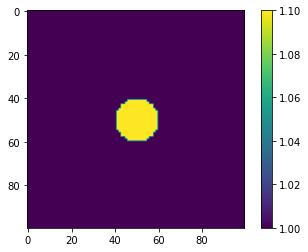

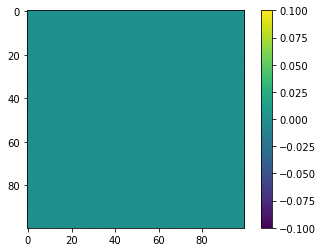

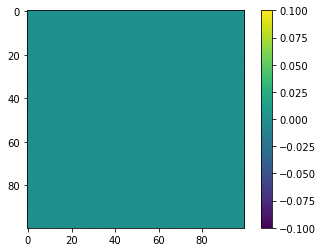

In [7]:
if __name__ == '__main__': #run the current script

    iteration_times= 500
    SW = shallow(N=100,px=50,py=50,R=100.)

    im = plt.imshow(SW.h)
    plt.colorbar(im)
    plt.show()

    im = plt.imshow(SW.u)
    plt.colorbar(im)
    plt.show()

    im = plt.imshow(SW.v)
    plt.colorbar(im)
    plt.show()
    
    iteration_times = 4000
    
    for i in range(iteration_times):
        SW.evolve()

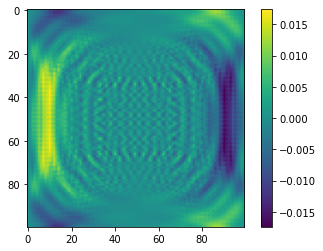

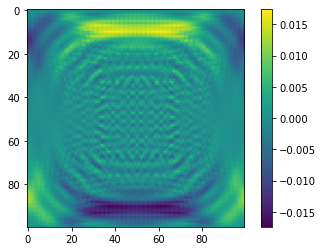

In [8]:
im = plt.imshow(SW.u)
plt.colorbar(im)
plt.show()

im = plt.imshow(SW.v)
plt.colorbar(im)
plt.show()

0
100
200
300
400
500
600
700
800
900


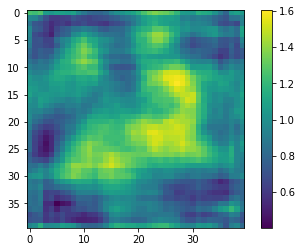

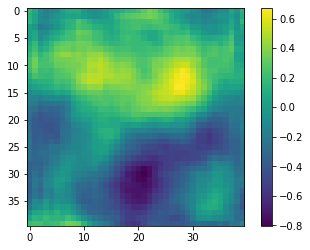

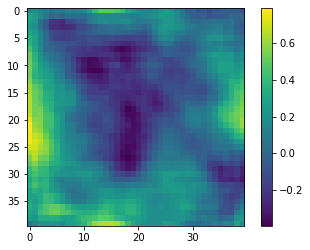

In [17]:
if __name__ == '__main__': #run the current script

    iteration_times= 500
    SW = shallow(N=40,px=20,py=20,R=40.)
    
    iteration_times = 1000
    
    B = 0.01*Balgovind(40,5)[:(40**2),:(40**2)]
    
    for i in range(iteration_times):
        SW.evolve()
        if i%100 == 0:
            print(i)
            
            SW.u += np.random.multivariate_normal(np.zeros(1600),B).reshape(40,40)
            SW.v += np.random.multivariate_normal(np.zeros(1600),B).reshape(40,40)
        
    
    im = plt.imshow(SW.h)
    plt.colorbar(im)
    plt.show()

    im = plt.imshow(SW.u)
    plt.colorbar(im)
    plt.show()

    im = plt.imshow(SW.v)
    plt.colorbar(im)
    plt.show()

0
100
200
300
400
500
600
700
800
900


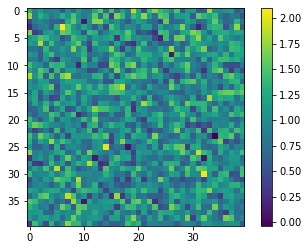

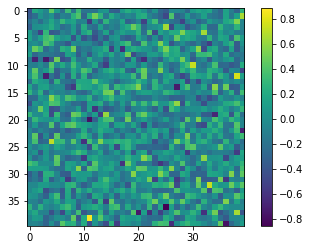

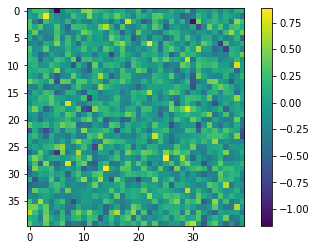

In [18]:
if __name__ == '__main__': #run the current script

    iteration_times= 500
    SW = shallow(N=40,px=20,py=20,R=40.)
    
    iteration_times = 1000
    
    B = 0.01*Balgovind(40,0.01)[:(40**2),:(40**2)]
    
    for i in range(iteration_times):
        SW.evolve()
        if i%100 == 0:
            print(i)
            
            SW.u += np.random.multivariate_normal(np.zeros(1600),B).reshape(40,40)
            SW.v += np.random.multivariate_normal(np.zeros(1600),B).reshape(40,40)
        
    
    im = plt.imshow(SW.h)
    plt.colorbar(im)
    plt.show()

    im = plt.imshow(SW.u)
    plt.colorbar(im)
    plt.show()

    im = plt.imshow(SW.v)
    plt.colorbar(im)
    plt.show()